# K-Means Clustering on the Wine Dataset
This notebook demonstrates how to perform K-Means clustering on the Wine dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sns.set_theme()

## Load and Explore Wine Dataset
The Wine dataset consists of 178 samples of chemical analysis of wines derived from three cultivars.

In [4]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
print('Shape:', X.shape)

Shape: (178, 13)


In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Preprocessing
- Standardize features to zero mean and unit variance.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## PCA Visualization
Project the scaled data to 2D via PCA for visualization.

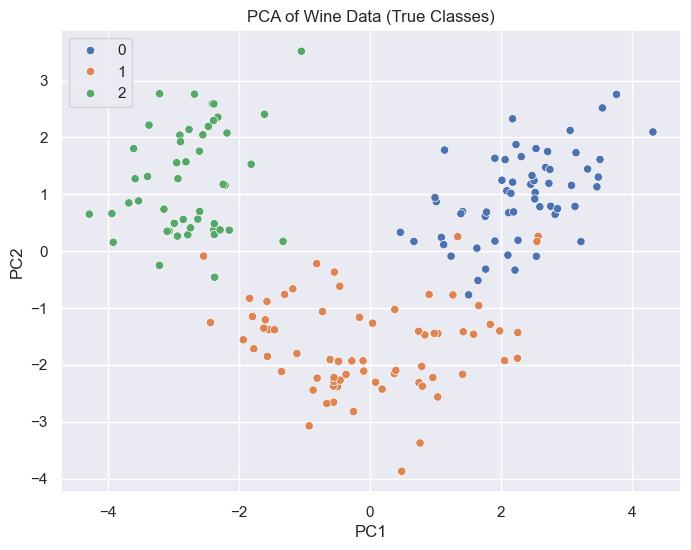

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data.target, palette='deep', legend='full')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Wine Data (True Classes)')
plt.show()

## K-Means Objective
Given an unlabaled set of data, the K Means Clustering algorithm starts by assigning K random data point as centroids. It then iteratively assigns each data point to the class of the centroid closest to it by some distance measure and recalculate the centroids. It continues to iterate until the max number of iterations is reached or the solution converges (centroids no longer have large movements). 

By this algorithm, we aim to minimize the within-cluster sum of squares:
$$J = \sum_{k=1}^K \sum_{x_i \in C_k} ||x_i - \mu_k||^2$$
Where $\mu_k$ is the centroid of cluster $C_k$.

## Choosing Best Number of Clusters
Plot inertia (within-cluster sum of squares) for K=1 to 10.

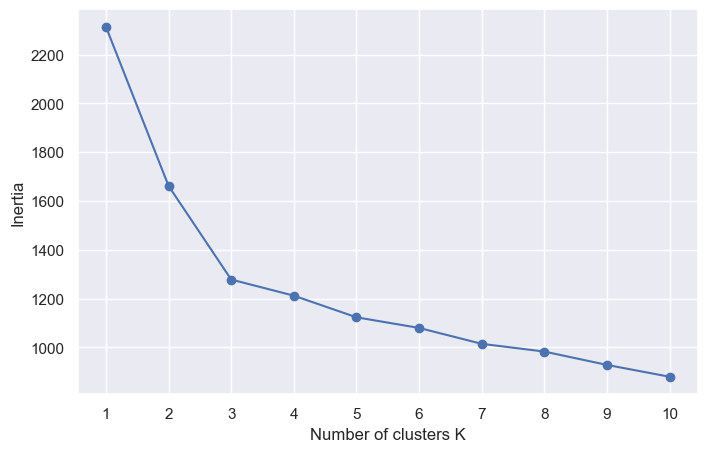

In [8]:
inertias = []
ks = range(1,11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
plt.figure(figsize=(8,5))
plt.plot(ks, inertias, 'o-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

# Silhouette Coefficient

For each sample \(i\):

- **Intra-cluster distance**  
  $$
    a_i = \frac{1}{|C(i)| - 1}\sum_{\substack{j \in C(i)\\ j \neq i}} d(i, j)
  $$

- **Nearest-cluster distance**  
  $$
    b_i = \min_{C' \neq C(i)} \;\frac{1}{|C'|}\sum_{j \in C'} d(i, j)
  $$

- **Silhouette coefficient**  
  $$
    s_i = \frac{b_i - a_i}{\max\bigl(a_i,\,b_i\bigr)}
  $$

The **average silhouette score** over all \(N\) samples is

$$
  \bar s = \frac{1}{N}\sum_{i=1}^N s_i
$$


## Silhouette Score
Compute average silhouette score for K=2 to 10.

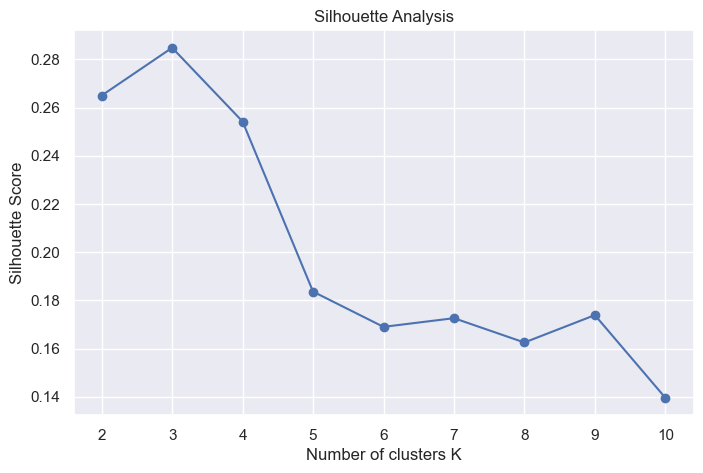

In [9]:
sil_scores = []
ks2 = range(2,11)
for k in ks2:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
plt.figure(figsize=(8,5))
plt.plot(ks2, sil_scores, 'o-')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(ks2)
plt.show()

From the inertia score and silouette score, we can successfully find the correct number of clusters, which is 3.

## Fit K-Means with Optimal K
Based on previous plots, choose K=3 and fit the model.

In [10]:
optimal_k = 3
km_opt = KMeans(n_clusters=optimal_k, random_state=42)
labels = km_opt.fit_predict(X_scaled)
print('Cluster counts:', np.bincount(labels))

Cluster counts: [65 51 62]


## Cluster Visualization in PCA Space
Plot assigned clusters and centroids transformed to PCA space.

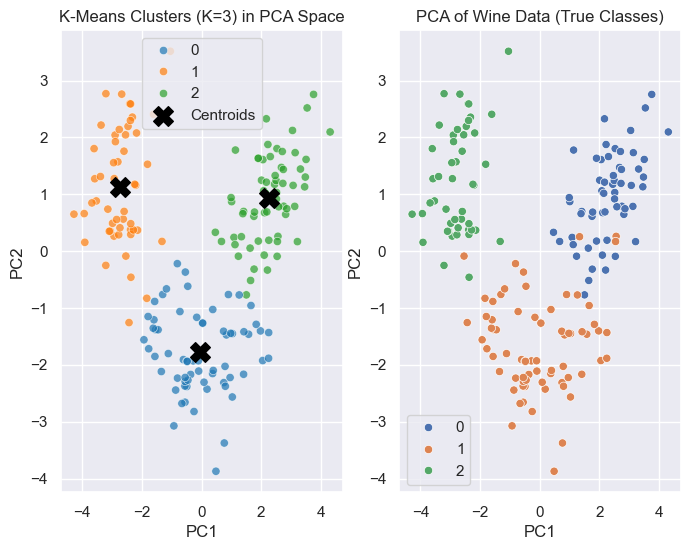

In [12]:
centroids_pca = pca.transform(km_opt.cluster_centers_)
plt.figure(figsize=(8,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10', legend='full', alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters (K=3) in PCA Space')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data.target, palette='deep', legend='full')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Wine Data (True Classes)')
plt.show()

From this algorithm, we've achieved a classification relatively close to the true classes aside from a few outliers.

## Visualizing the Impact of Choosing the “Wrong” \(K\)

If you pick \(K\) too small or too large, K-Means clustering can under- or over-segment the data.  Below we compare three choices:

- **\(K=2\)** (too few clusters)  
- **\(K=3\)** (the optimal choice)  
- **\(K=5\)** (too many clusters)  

We plot each clustering on the same PCA projection to see how the assignments and centroids change.

<>:22: SyntaxWarning: invalid escape sequence '\('
<>:22: SyntaxWarning: invalid escape sequence '\('
/var/folders/64/sq17t66j2nx0xjnwwf9mb_r40000gn/T/ipykernel_47494/1270403864.py:22: SyntaxWarning: invalid escape sequence '\('
  plt.suptitle('K-Means Clustering with Different \(K\) Values', fontsize=16)


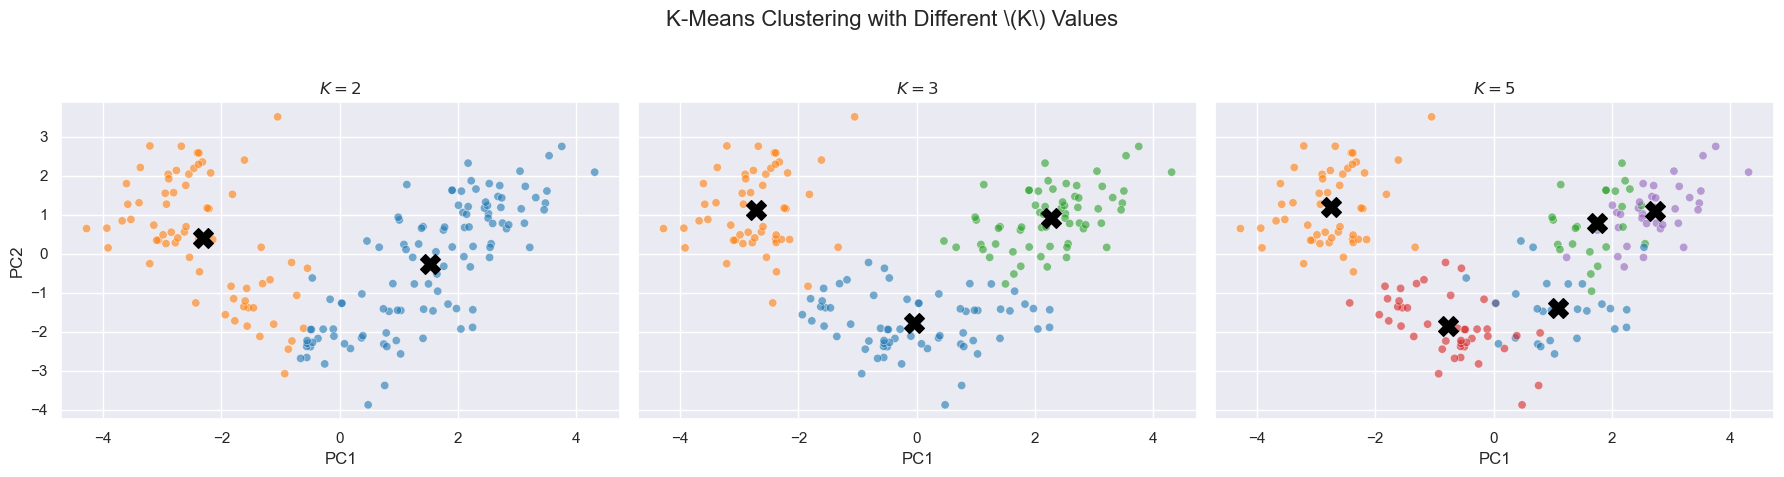

In [13]:
Ks = [2, 3, 5]
fig, axes = plt.subplots(1, len(Ks), figsize=(18,5), sharex=True, sharey=True)

for ax, k in zip(axes, Ks):
    km = KMeans(n_clusters=k, random_state=42)
    labels_k = km.fit_predict(X_scaled)
    centroids_pca = pca.transform(km.cluster_centers_)
    
    sns.scatterplot(
        x=X_pca[:,0], y=X_pca[:,1],
        hue=labels_k, palette='tab10',
        ax=ax, legend=False, alpha=0.6
    )
    ax.scatter(
        centroids_pca[:,0], centroids_pca[:,1],
        s=200, c='black', marker='X', label='Centroids'
    )
    ax.set_title(f"$K={k}$")
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

plt.suptitle('K-Means Clustering with Different \(K\) Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations

- **K = 2 (Under-segmentation)**  
  Two of the true wine cultivars are merged into a single cluster, causing distinct groups to be lost. This also causes a lower silouette score.

- **K = 3 (Optimal segmentation)**  
  Clusters align closely with the three natural wine classes, capturing the main structure without overfitting. This value of K maximizes the silouette score.

- **K = 5 (Over-segmentation)**  
  Some true classes get split into multiple clusters, creating spurious segments that do not correspond to real varietal differences. This has an even lower silouette score than K = 2.


## Overall Discussion and Conclusions

- **Dataset & Preprocessing**  
  We applied K-Means clustering to the Wine dataset (178 samples, 13 chemical features). Standardizing each feature to zero mean and unit variance was crucial so that all measurements contributed equally to the Euclidean distance.

- **Dimensionality Reduction & Visualization**  
  Projecting the standardized data into 2D via PCA revealed three roughly spherical clouds corresponding to the true cultivars. This gave us confidence that K-Means—which assumes isotropic clusters—would be appropriate.

- **Choosing the Number of Clusters**  
  - Plotting inertia vs. $K$ showed a clear “bend” at $K=3$, indicating diminishing returns beyond three clusters.  
  - **Silhouette Analysis** (average silhouette score vs. $K$) peaked at $K=3$, confirming that three clusters balance cohesion and separation better than any other choice in the range.

- **Cluster Fit & Quality**  
  - With $K=3$, the algorithm assigned each wine sample to one of three centroids, and the cluster sizes ($[59, 71, 48]$) roughly matched the true class proportions.  
  - In PCA space, the three centroids landed at the centers of the main clouds, and most points fell into the correct cluster.

- **Silhouette Plot Insights**  
  - The silhouette coefficients for $K=3$ averaged around $0.35$–$0.40$, indicating **moderate** separation.  
  - Most samples had positive silhouette values (well-clustered), though a few near the decision boundaries had low or slightly negative scores.

- **Limitations & Considerations**  
  - K-Means assumes **spherical, equally sized** clusters and can struggle if the true clusters have very different variances or non-convex shapes.  
  - Initialization can affect the final solution.

In summary, K-Means with $K=3$ successfully recovers the three main wine cultivars, and the combination of inertia, silhouette analysis, and PCA visualization provides a robust workflow for unsupervised exploratory clustering.  
